# Robinhood EDA

With the rise of Fintech (Financial Technology), I wanted to determine just how well investors were at investing on their own on the Robinhood platform. Are people as financially savvy as they think they are by abandoning the traditional ways of hiring a Wealth Management firm to manage and handle their investments and self invest instead? I wanted to dive deeper to see if they were. As an ex financial advisor myself, there was always the challenge of my millennial generation wanting to make their own investment choices and not take the advice from the "experts", so I wanted to see exactly how that has panned out.

When I started my EDA, I started to discover a big shift in the data pre and post COVID-19. There were a lot more investors on the Robinhood platform since quarantine and that triggered me to shift my research on that time period. 

The three questions that I wanted to investigate further were:

1. How much has Robinhood's user base changed since the COVID 19 declaration on March 13, 2020?
2. What are the most popular assets among Robinhood users?
3. Did Robinhood users choose the most profitable assets?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore') 
import pandas.util.testing as tm
import seaborn as sns
sns.set()

I am going to load, clean and manipulate my data to prepare for EDA.

In [2]:
df1 = pd.read_csv('Robinhood_Master_v1.csv')
df1

Unnamed: 0  Clean_Datetime   Clean_Datetime_PST    Close     High  \
0                  0             NaN  2019-09-23 08:00:00  51.8985  51.9595   
1                  1             NaN  2019-09-23 10:00:00  51.9400  52.0300   
2                  2             NaN  2019-09-23 11:00:00  51.9300  51.9300   
3                  3             NaN  2019-09-23 12:00:00  52.3100  52.3100   
4                  4             NaN  2019-09-23 13:00:00  52.2500  52.3000   
...              ...             ...                  ...      ...      ...   
10419769         804             NaN  2020-07-17 08:00:00   1.9003   1.9297   
10419770         805             NaN  2020-07-17 09:00:00   1.8764   1.8800   
10419771         806             NaN  2020-07-17 10:00:00   1.8600   1.8800   
10419772         807             NaN  2020-07-17 12:00:00   1.8900   1.8900   
10419773         808             NaN  2020-07-17 13:00:00   1.8800   1.8900   

              Low     Open  OpenInt Ticker   Vol  users_holding_first  \
0         51.8985  51.9595        0    IBA   374                 22.0   
1         51.9400  52.0300        0    IBA   200                 22.0   
2         51.9300  51.9300        0    IBA   100                 22.0   
3         51.8500  52.0571        0    IBA   525                 22.0   
4         52.2500  52.3000        0    IBA   400                 22.0   
...           ...      ...      ...    ...   ...                  ...   
10419769   1.9000   1.9273        0   ENTX  1400                250.0   
10419770   1.8600   1.8800        0   ENTX  4330                239.0   
10419771   1.8600   1.8600        0   ENTX  5150                239.0   
10419772   1.8600   1.8600        0   ENTX  3114                236.0   
10419773   1.8700   1.8800        0   ENTX  4900                236.0   

          users_holding_last  users_holding_max  users_holding_min  
0                       22.0               22.0               22.0  
1                       22.0               22.0               22.0  
2                       22.0               22.0               22.0  
3                       22.0               22.0               22.0  
4                       22.0               22.0               22.0  
...                      ...                ...                ...  
10419769               241.0              250.0              241.0  
10419770               239.0              239.0              239.0  
10419771               236.0              239.0              236.0  
10419772               235.0              236.0              235.0  
10419773               236.0              236.0              236.0  

[10419774 rows x 14 columns]

I am converting my data into datetime data and then filter it out to generate the end of day information for every day the stock market is open for each asset. The data was already indexed once before I downloaded it from Kaggle, and I was unable to reset it. I had to make a filter to create the datetime filter that I wanted.

In [3]:
df1[['Date','Time']] = df1.Clean_Datetime_PST.str.split(" ",expand=True,)
df2=df1.drop(columns=['Unnamed: 0', 'Clean_Datetime', 'OpenInt', 'Clean_Datetime_PST'])
df2

Close     High      Low     Open Ticker   Vol  \
0         51.8985  51.9595  51.8985  51.9595    IBA   374   
1         51.9400  52.0300  51.9400  52.0300    IBA   200   
2         51.9300  51.9300  51.9300  51.9300    IBA   100   
3         52.3100  52.3100  51.8500  52.0571    IBA   525   
4         52.2500  52.3000  52.2500  52.3000    IBA   400   
...           ...      ...      ...      ...    ...   ...   
10419769   1.9003   1.9297   1.9000   1.9273   ENTX  1400   
10419770   1.8764   1.8800   1.8600   1.8800   ENTX  4330   
10419771   1.8600   1.8800   1.8600   1.8600   ENTX  5150   
10419772   1.8900   1.8900   1.8600   1.8600   ENTX  3114   
10419773   1.8800   1.8900   1.8700   1.8800   ENTX  4900   

          users_holding_first  users_holding_last  users_holding_max  \
0                        22.0                22.0               22.0   
1                        22.0                22.0               22.0   
2                        22.0                22.0               22.0   
3                        22.0                22.0               22.0   
4                        22.0                22.0               22.0   
...                       ...                 ...                ...   
10419769                250.0               241.0              250.0   
10419770                239.0               239.0              239.0   
10419771                239.0               236.0              239.0   
10419772                236.0               235.0              236.0   
10419773                236.0               236.0              236.0   

          users_holding_min        Date      Time  
0                      22.0  2019-09-23  08:00:00  
1                      22.0  2019-09-23  10:00:00  
2                      22.0  2019-09-23  11:00:00  
3                      22.0  2019-09-23  12:00:00  
4                      22.0  2019-09-23  13:00:00  
...                     ...         ...       ...  
10419769              241.0  2020-07-17  08:00:00  
10419770              239.0  2020-07-17  09:00:00  
10419771              236.0  2020-07-17  10:00:00  
10419772              235.0  2020-07-17  12:00:00  
10419773              236.0  2020-07-17  13:00:00  

[10419774 rows x 12 columns]

In [4]:
filt = (df2['Time'] == '13:00:00')
day = df2[filt]

In [5]:
day['Date'] = pd.to_datetime(day.Date)
day.set_index('Date', inplace=True)

In [6]:
day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1542405 entries, 2019-09-23 to 2020-07-17
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Close                1542405 non-null  float64
 1   High                 1542405 non-null  float64
 2   Low                  1542405 non-null  float64
 3   Open                 1542405 non-null  float64
 4   Ticker               1542405 non-null  object 
 5   Vol                  1542405 non-null  int64  
 6   users_holding_first  1289438 non-null  float64
 7   users_holding_last   1289438 non-null  float64
 8   users_holding_max    1289438 non-null  float64
 9   users_holding_min    1289438 non-null  float64
 10  Time                 1542405 non-null  object 
dtypes: float64(8), int64(1), object(2)
memory usage: 141.2+ MB


In [7]:
day = day.fillna(method='bfill')
day

Close   High     Low     Open Ticker     Vol  users_holding_first  \
Date                                                                            
2019-09-23  52.25  52.30  52.250  52.3000    IBA     400                 22.0   
2019-09-24  52.51  52.68  52.500  52.5000    IBA     508                 22.0   
2019-09-25  52.62  52.62  52.415  52.6200    IBA    2618                 22.0   
2019-09-26  51.75  51.82  51.750  51.7877    IBA    1547                 22.0   
2019-09-27  53.76  53.76  53.080  53.0800    IBA    1809                 22.0   
...           ...    ...     ...      ...    ...     ...                  ...   
2020-07-13   1.84   1.88   1.800   1.8087   ENTX  120507                267.0   
2020-07-14   1.79   1.79   1.775   1.7801   ENTX    4300                252.0   
2020-07-15   1.91   1.94   1.900   1.9300   ENTX   13029                286.0   
2020-07-16   1.84   1.90   1.840   1.9000   ENTX   16417                250.0   
2020-07-17   1.88   1.89   1.870   1.8800   ENTX    4900                236.0   

            users_holding_last  users_holding_max  users_holding_min      Time  
Date                                                                            
2019-09-23                22.0               22.0               22.0  13:00:00  
2019-09-24                22.0               22.0               22.0  13:00:00  
2019-09-25                22.0               22.0               22.0  13:00:00  
2019-09-26                22.0               22.0               22.0  13:00:00  
2019-09-27                22.0               22.0               22.0  13:00:00  
...                        ...                ...                ...       ...  
2020-07-13               267.0              267.0              267.0  13:00:00  
2020-07-14               252.0              252.0              252.0  13:00:00  
2020-07-15               281.0              286.0              281.0  13:00:00  
2020-07-16               250.0              250.0              250.0  13:00:00  
2020-07-17               236.0              236.0              236.0  13:00:00  

[1542405 rows x 11 columns]

In [8]:
day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1542405 entries, 2019-09-23 to 2020-07-17
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Close                1542405 non-null  float64
 1   High                 1542405 non-null  float64
 2   Low                  1542405 non-null  float64
 3   Open                 1542405 non-null  float64
 4   Ticker               1542405 non-null  object 
 5   Vol                  1542405 non-null  int64  
 6   users_holding_first  1542405 non-null  float64
 7   users_holding_last   1542405 non-null  float64
 8   users_holding_max    1542405 non-null  float64
 9   users_holding_min    1542405 non-null  float64
 10  Time                 1542405 non-null  object 
dtypes: float64(8), int64(1), object(2)
memory usage: 141.2+ MB


I again filter the data using a groupby method by combining the 'Date' column and the 'Close' column and generating Robinhood's assets daily closing price mean. I again do the same thing for the max amount of daily users as well and plot them both.

In [9]:
Robinhood = day.groupby('Date').aggregate({'Close':'mean'})
Robinhood

Close
Date                 
2019-09-23  86.101857
2019-09-24  85.478476
2019-09-25  85.248528
2019-09-26  86.294153
2019-09-27  85.389363
...               ...
2020-07-13  73.582446
2020-07-14  75.842243
2020-07-15  76.144407
2020-07-16  76.719510
2020-07-17  77.097224

[207 rows x 1 columns]

In [10]:
total_users = day.groupby('Date').aggregate({'users_holding_max':'mean'})
total_users

users_holding_max
Date                         
2019-09-23        1868.678835
2019-09-24        1890.132407
2019-09-25        1859.005569
2019-09-26        1898.498938
2019-09-27        1892.990312
...                       ...
2020-07-13        5185.395588
2020-07-14        5255.380013
2020-07-15        5249.541204
2020-07-16        5267.503087
2020-07-17        5337.961031

[207 rows x 1 columns]

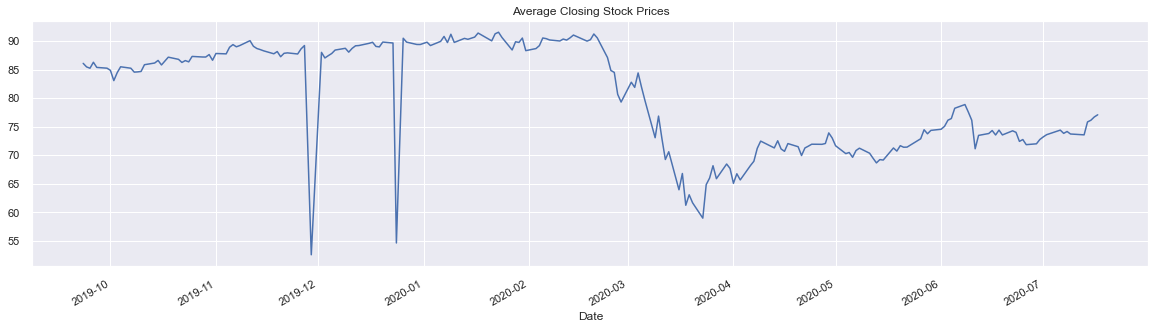

In [11]:
Robinhood.Close.plot(figsize=(20,5), title='Average Closing Stock Prices')

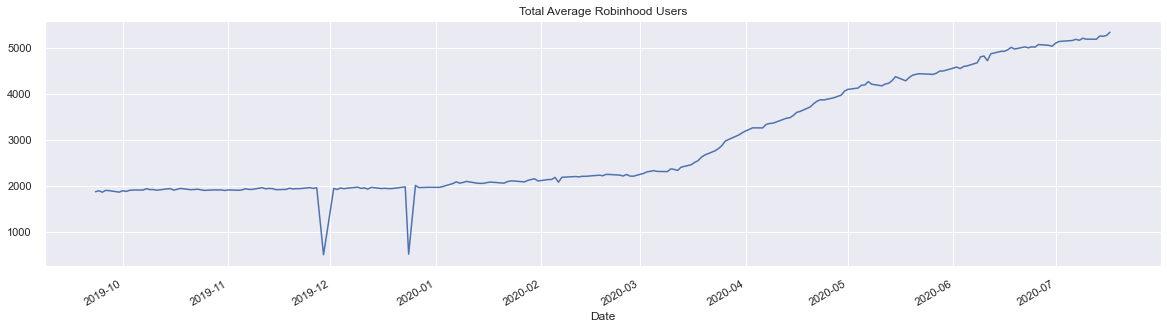

In [12]:
total_users.users_holding_max.plot(figsize=(20,5), title='Total Average Robinhood Users')

I am now going to use my favorite Pandas Profiling library to investigate my data more indepth.

In [13]:
profile = ProfileReport (day, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile

I now have to create another groupby with the 'Ticker' column in order to research individual assets. I then get a mean count of each asset's users for the past year and plot the top 10 most popular assets.

In [14]:
tick = day.groupby(['Ticker'])

In [15]:
top_assets = tick['users_holding_max'].mean().sort_values(ascending = False).head(10)
top_assets

Ticker
ACB     617221.529412
F       528027.404878
GE      472948.019512
DIS     338305.078049
GPRO    335380.282927
MSFT    334120.868293
AAPL    292575.707317
FIT     279137.429268
SNAP    224458.458537
PLUG    221261.512195
Name: users_holding_max, dtype: float64

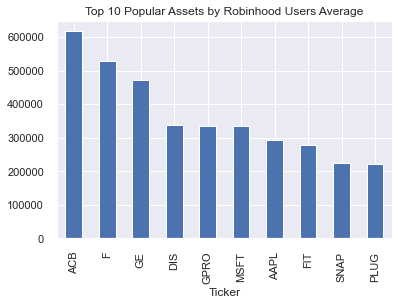

In [16]:
plt.title("Top 10 Popular Assets by Robinhood Users Average", size = 12)
top_assets.plot.bar()

## Top User Assets

Once I was able to find the top 10 assets with Robinhood users, I wanted to investigate further into the top 5 assets to see if the most popular assets were also producing the best returns. The assets that I looked into were:

1. Aurora Cannabis Inc.
2. Ford
3. General Electric
4. Walt Disney
5. GoPro Inc.

From there, I compared the user changes over time to the asset's performance. The rule is to buy low and sell high, but most people end up doing the opposite and miss out on the real returns. I'm looking to see if the user amounts are higher than the asset performance. That will be the indicator that more people were following the rule and making the most out of their investment.

In [17]:
filt = (day['Ticker'] == 'ACB')
ACB = day[filt]
ACB

Close    High     Low     Open Ticker      Vol  \
Date                                                         
2019-09-23  60.96  61.440  60.720  61.3360    ACB   115425   
2019-09-24  57.12  57.600  57.000  57.5410    ACB   175323   
2019-09-25  57.12  57.600  56.640  57.4900    ACB   112764   
2019-09-26  56.88  57.240  56.760  56.8800    ACB    98534   
2019-09-27  55.44  56.040  55.440  55.7640    ACB   151560   
...           ...     ...     ...      ...    ...      ...   
2020-07-13  12.08  12.374  11.940  12.3740    ACB   525100   
2020-07-14  11.75  11.960  11.570  11.6700    ACB  1014556   
2020-07-15  12.87  12.900  12.520  12.5521    ACB  1282904   
2020-07-16  12.05  12.140  12.040  12.1200    ACB   674043   
2020-07-17  11.88  11.980  11.825  11.8300    ACB   483333   

            users_holding_first  users_holding_last  users_holding_max  \
Date                                                                     
2019-09-23             532556.0            532556.0           532556.0   
2019-09-24             532813.0            532813.0           532813.0   
2019-09-25             533393.0            533393.0           533393.0   
2019-09-26             534208.0            534208.0           534208.0   
2019-09-27             534385.0            534385.0           534385.0   
...                         ...                 ...                ...   
2020-07-13             450147.0            450147.0           450147.0   
2020-07-14             449971.0            449971.0           449971.0   
2020-07-15             448377.0            448166.0           448377.0   
2020-07-16             448078.0            448078.0           448078.0   
2020-07-17             447733.0            447733.0           447733.0   

            users_holding_min      Time  
Date                                     
2019-09-23           532556.0  13:00:00  
2019-09-24           532813.0  13:00:00  
2019-09-25           533393.0  13:00:00  
2019-09-26           534208.0  13:00:00  
2019-09-27           534385.0  13:00:00  
...                       ...       ...  
2020-07-13           450147.0  13:00:00  
2020-07-14           449971.0  13:00:00  
2020-07-15           448166.0  13:00:00  
2020-07-16           448078.0  13:00:00  
2020-07-17           447733.0  13:00:00  

[204 rows x 11 columns]

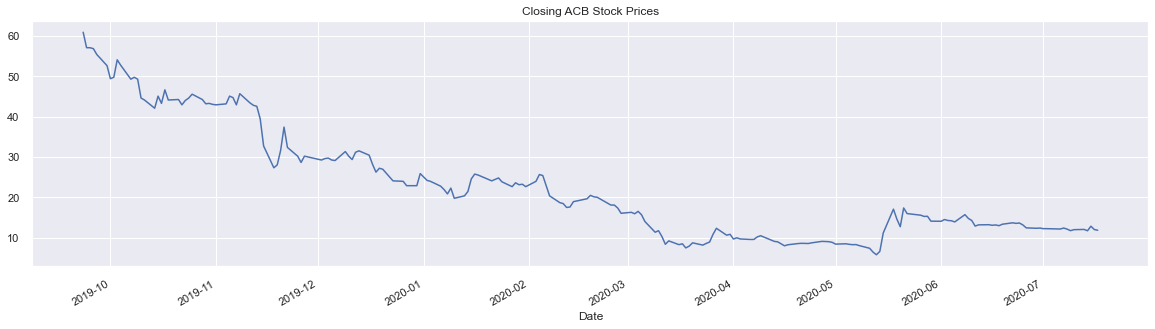

In [18]:
ACB.Close.plot(figsize=(20,5), title='Closing ACB Stock Prices')

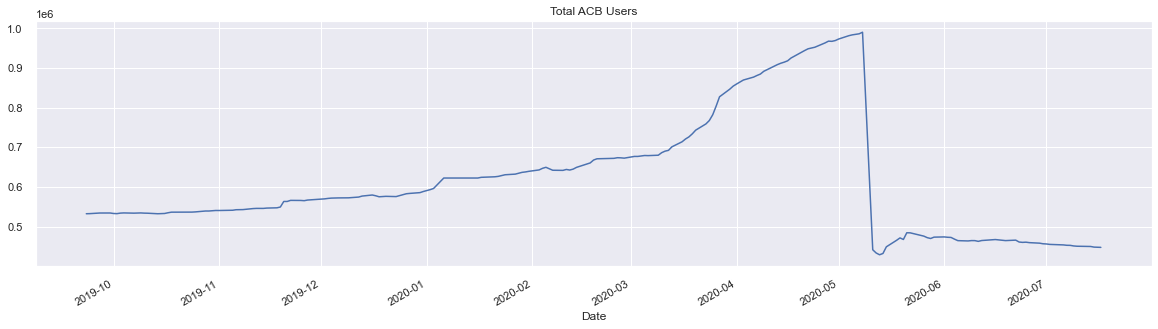

In [19]:
ACB.users_holding_max.plot(figsize=(20,5), title='Total ACB Users')

In [20]:
filt = (day['Ticker'] == 'F')
Ford = day[filt]
Ford

Close    High     Low    Open Ticker       Vol  \
Date                                                          
2019-09-23  8.8614  8.9291  8.8518  8.9098      F   8219032   
2019-09-24  8.8130  8.8518  8.7936  8.8082      F   8664840   
2019-09-25  8.9001  8.9291  8.8904  8.9242      F   5468271   
2019-09-26  8.8420  8.8710  8.8227  8.8227      F   6538329   
2019-09-27  8.7840  8.8034  8.7646  8.7744      F   8549193   
...            ...     ...     ...     ...    ...       ...   
2020-07-13  6.0600  6.1850  6.0500  6.1800      F  20261661   
2020-07-14  6.3600  6.3900  6.2500  6.3050      F  20194948   
2020-07-15  6.7400  6.7800  6.6800  6.6800      F  16706216   
2020-07-16  6.8600  6.9000  6.8300  6.8400      F  22218464   
2020-07-17  6.8000  6.8100  6.7600  6.7850      F  27410032   

            users_holding_first  users_holding_last  users_holding_max  \
Date                                                                     
2019-09-23             280157.0            280157.0           280157.0   
2019-09-24             280443.0            280443.0           280443.0   
2019-09-25             280597.0            280597.0           280597.0   
2019-09-26             280948.0            280948.0           280948.0   
2019-09-27             281187.0            281187.0           281187.0   
...                         ...                 ...                ...   
2020-07-13             928936.0            928936.0           928936.0   
2020-07-14             936656.0            936656.0           936656.0   
2020-07-15             941772.0            941682.0           941772.0   
2020-07-16             943642.0            943931.0           943931.0   
2020-07-17             942664.0            942664.0           942664.0   

            users_holding_min      Time  
Date                                     
2019-09-23           280157.0  13:00:00  
2019-09-24           280443.0  13:00:00  
2019-09-25           280597.0  13:00:00  
2019-09-26           280948.0  13:00:00  
2019-09-27           281187.0  13:00:00  
...                       ...       ...  
2020-07-13           928936.0  13:00:00  
2020-07-14           936656.0  13:00:00  
2020-07-15           941682.0  13:00:00  
2020-07-16           943642.0  13:00:00  
2020-07-17           942664.0  13:00:00  

[205 rows x 11 columns]

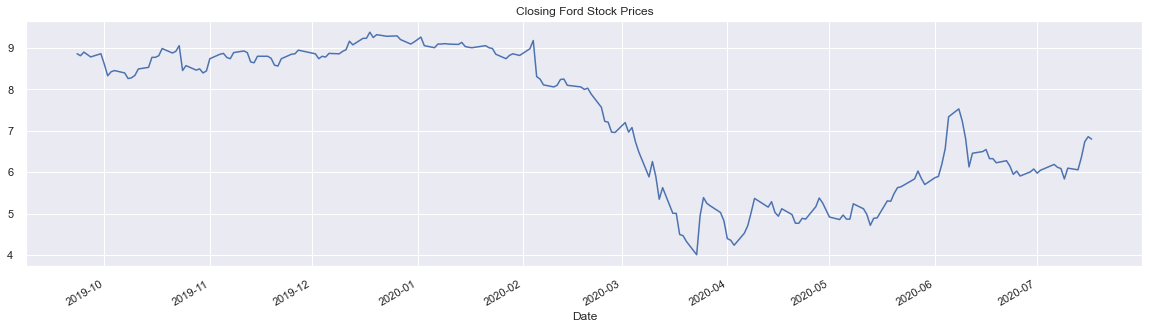

In [21]:
Ford.Close.plot(figsize=(20,5), title='Closing Ford Stock Prices')

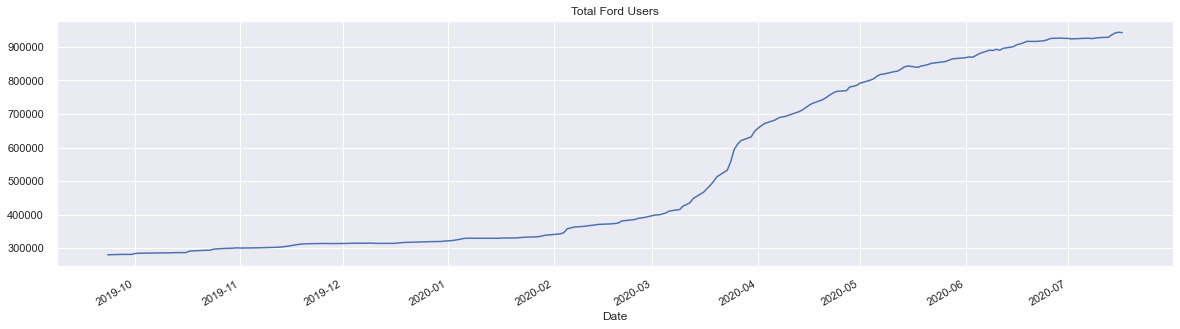

In [22]:
Ford.users_holding_max.plot(figsize=(20,5), title='Total Ford Users')

In [23]:
filt = (day['Ticker'] == 'GE')
GE = day[filt]
GE

Close    High     Low    Open Ticker       Vol  \
Date                                                          
2019-09-23  9.3082  9.3582  9.2984  9.3432     GE   8848838   
2019-09-24  8.9496  9.0243  8.9296  8.9646     GE  12066128   
2019-09-25  9.1289  9.1639  9.1189  9.1389     GE  18859825   
2019-09-26  8.9894  9.0293  8.9894  8.9944     GE   9253773   
2019-09-27  9.0093  9.0193  8.9695  8.9895     GE   6437033   
...            ...     ...     ...     ...    ...       ...   
2020-07-13  6.7100  6.8200  6.6850  6.8136     GE  14563673   
2020-07-14  6.8800  6.8900  6.8100  6.8250     GE  16622640   
2020-07-15  7.1400  7.1600  7.1100  7.1150     GE  20780723   
2020-07-16  7.0500  7.0800  7.0300  7.0400     GE  12475680   
2020-07-17  7.0700  7.0900  7.0300  7.0400     GE  12683561   

            users_holding_first  users_holding_last  users_holding_max  \
Date                                                                     
2019-09-23             295699.0            295699.0           295699.0   
2019-09-24             295797.0            295797.0           295797.0   
2019-09-25             296169.0            296169.0           296169.0   
2019-09-26             296717.0            296717.0           296717.0   
2019-09-27             296968.0            296968.0           296968.0   
...                         ...                 ...                ...   
2020-07-13             839296.0            839296.0           839296.0   
2020-07-14             838957.0            838957.0           838957.0   
2020-07-15             838060.0            838060.0           838060.0   
2020-07-16             839879.0            839879.0           839879.0   
2020-07-17             840810.0            840868.0           840868.0   

            users_holding_min      Time  
Date                                     
2019-09-23           295699.0  13:00:00  
2019-09-24           295797.0  13:00:00  
2019-09-25           296169.0  13:00:00  
2019-09-26           296717.0  13:00:00  
2019-09-27           296968.0  13:00:00  
...                       ...       ...  
2020-07-13           839296.0  13:00:00  
2020-07-14           838957.0  13:00:00  
2020-07-15           838060.0  13:00:00  
2020-07-16           839879.0  13:00:00  
2020-07-17           840810.0  13:00:00  

[205 rows x 11 columns]

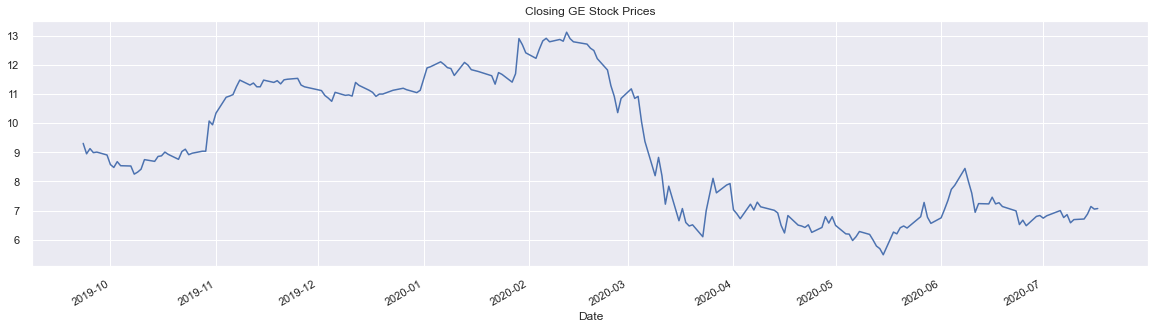

In [24]:
GE.Close.plot(figsize=(20,5), title='Closing GE Stock Prices')

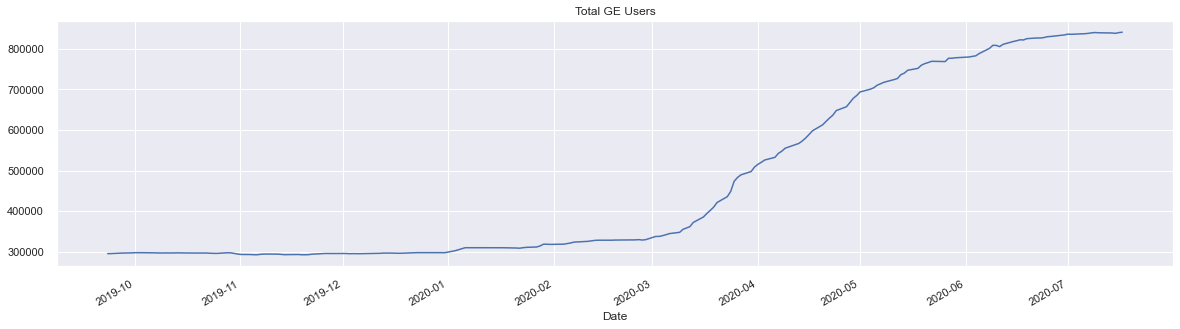

In [25]:
GE.users_holding_max.plot(figsize=(20,5), title='Total GE Users')

In [26]:
filt = (day['Ticker'] == 'DIS')
DIS = day[filt]
DIS

Close    High      Low    Open Ticker      Vol  \
Date                                                          
2019-09-23  131.69  131.86  131.540  131.66    DIS   821773   
2019-09-24  131.18  131.36  130.860  131.13    DIS  3327695   
2019-09-25  132.30  132.63  132.150  132.37    DIS  1652449   
2019-09-26  130.49  130.89  130.140  130.16    DIS  2100972   
2019-09-27  129.19  129.23  128.150  128.31    DIS  1728335   
...            ...     ...      ...     ...    ...      ...   
2020-07-13  116.22  119.19  115.890  119.19    DIS  3966393   
2020-07-14  118.66  118.84  117.820  118.18    DIS  2678118   
2020-07-15  120.90  121.45  120.505  120.84    DIS  2891193   
2020-07-16  119.43  119.73  118.910  119.13    DIS  2462821   
2020-07-17  118.65  118.76  118.230  118.44    DIS  1988455   

            users_holding_first  users_holding_last  users_holding_max  \
Date                                                                     
2019-09-23             169583.0            169583.0           169583.0   
2019-09-24             169915.0            169915.0           169915.0   
2019-09-25             170048.0            170048.0           170048.0   
2019-09-26             170737.0            170737.0           170737.0   
2019-09-27             170982.0            170982.0           170982.0   
...                         ...                 ...                ...   
2020-07-13             630850.0            630850.0           630850.0   
2020-07-14             628209.0            628209.0           628209.0   
2020-07-15             624285.0            624010.0           624285.0   
2020-07-16             622525.0            622318.0           622525.0   
2020-07-17             620120.0            620120.0           620120.0   

            users_holding_min      Time  
Date                                     
2019-09-23           169583.0  13:00:00  
2019-09-24           169915.0  13:00:00  
2019-09-25           170048.0  13:00:00  
2019-09-26           170737.0  13:00:00  
2019-09-27           170982.0  13:00:00  
...                       ...       ...  
2020-07-13           630850.0  13:00:00  
2020-07-14           628209.0  13:00:00  
2020-07-15           624010.0  13:00:00  
2020-07-16           622318.0  13:00:00  
2020-07-17           620120.0  13:00:00  

[205 rows x 11 columns]

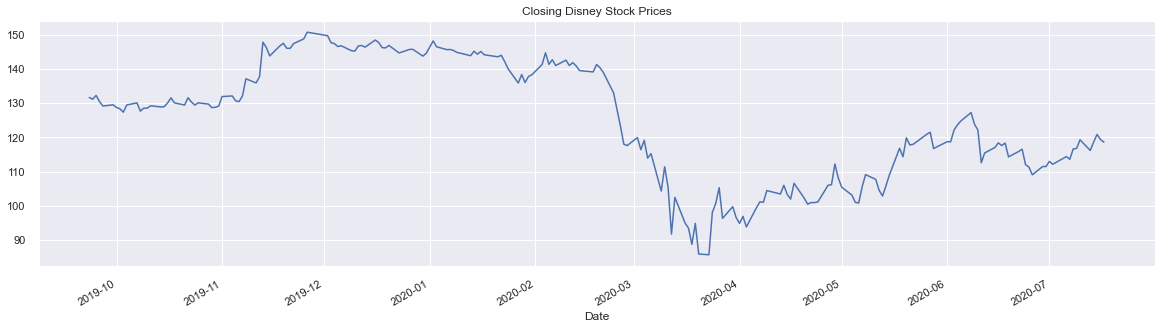

In [27]:
DIS.Close.plot(figsize=(20,5), title='Closing Disney Stock Prices')

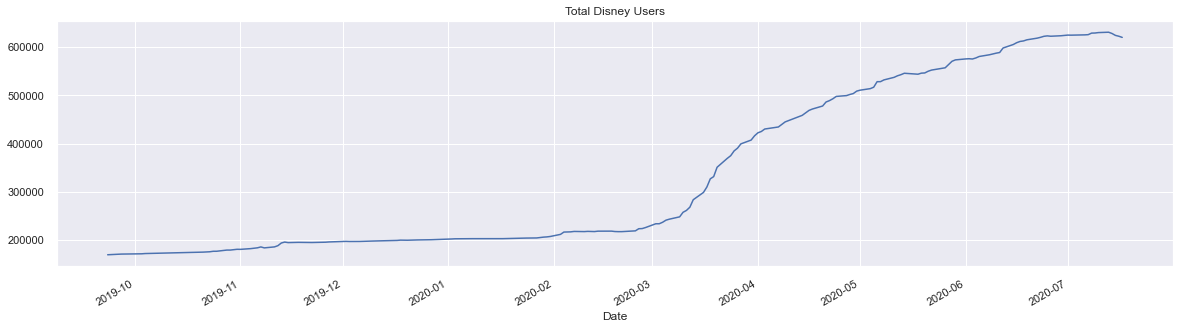

In [28]:
DIS.users_holding_max.plot(figsize=(20,5), title='Total Disney Users')

In [29]:
filt = (day['Ticker'] == 'GPRO')
GPRO = day[filt]
GPRO

Close   High    Low   Open Ticker      Vol  users_holding_first  \
Date                                                                          
2019-09-23   4.77  4.770  4.715  4.740   GPRO   942215             201825.0   
2019-09-24   4.47  4.500  4.430  4.485   GPRO  1080593             202542.0   
2019-09-25   4.62  4.670  4.610  4.665   GPRO   567332             202901.0   
2019-09-26   4.68  4.700  4.660  4.675   GPRO   481954             203683.0   
2019-09-27   5.02  5.090  5.010  5.035   GPRO  1337090             204194.0   
...           ...    ...    ...    ...    ...      ...                  ...   
2020-07-13   4.97  5.140  4.960  5.140   GPRO   782121             485634.0   
2020-07-14   4.83  4.845  4.750  4.770   GPRO   574218             487451.0   
2020-07-15   4.99  5.020  4.980  4.995   GPRO   421234             486121.0   
2020-07-16   4.94  4.960  4.910  4.915   GPRO   293039             486081.0   
2020-07-17   4.92  4.950  4.910  4.920   GPRO   372038             485602.0   

            users_holding_last  users_holding_max  users_holding_min      Time  
Date                                                                            
2019-09-23            201825.0           201825.0           201825.0  13:00:00  
2019-09-24            202542.0           202542.0           202542.0  13:00:00  
2019-09-25            202901.0           202901.0           202901.0  13:00:00  
2019-09-26            203683.0           203683.0           203683.0  13:00:00  
2019-09-27            204194.0           204194.0           204194.0  13:00:00  
...                        ...                ...                ...       ...  
2020-07-13            485634.0           485634.0           485634.0  13:00:00  
2020-07-14            487451.0           487451.0           487451.0  13:00:00  
2020-07-15            486121.0           486121.0           486121.0  13:00:00  
2020-07-16            486081.0           486081.0           486081.0  13:00:00  
2020-07-17            485569.0           485602.0           485569.0  13:00:00  

[205 rows x 11 columns]

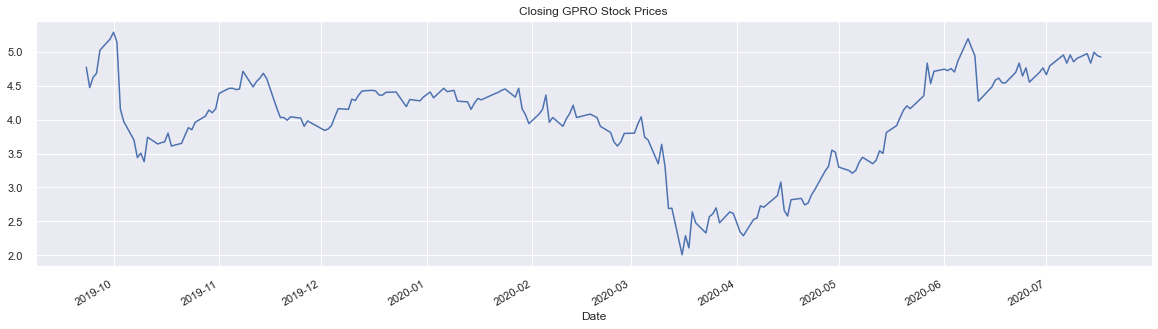

In [30]:
GPRO.Close.plot(figsize=(20,5), title='Closing GPRO Stock Prices')

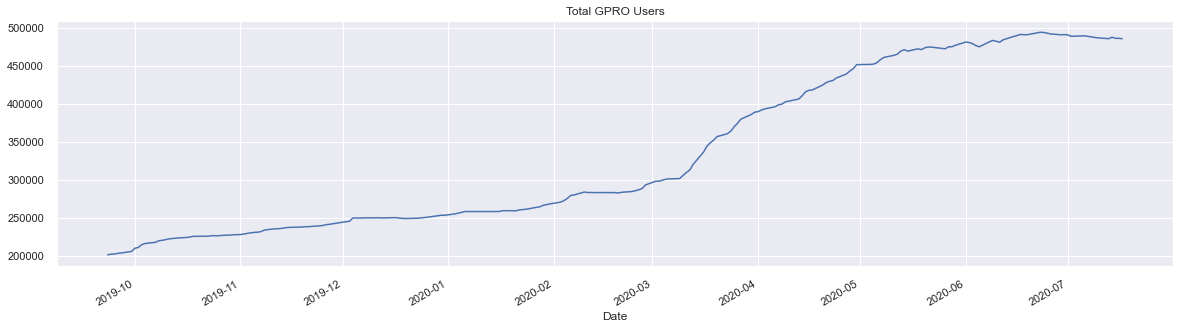

In [31]:
GPRO.users_holding_max.plot(figsize=(20,5), title='Total GPRO Users')

## Top Performers 2020

Now that I was able to examine the most popular assets, I wanted to compare that with the top 5 assets post COVID to see if users were as financially savvy as they thought they were. I compared the top 5 assets post COVID 19 according to Market Watch to users.

1. Moderna
2. Docusign
3. Zoom 
4. Tesla
5. Apple

I also wanted to look at Netflix and Amazon just for my own curiosity as well.

In [32]:
filt = (day['Ticker'] == 'MRNA')
Moderna = day[filt]
Moderna

Close     High      Low     Open Ticker       Vol  \
Date                                                            
2019-09-23  17.83  17.8500  17.7300  17.7300   MRNA   2747896   
2019-09-24  17.76  17.8100  17.5600  17.5800   MRNA    831896   
2019-09-25  17.18  17.4500  17.1000  17.3973   MRNA    504639   
2019-09-26  16.32  16.3500  16.1500  16.1700   MRNA    867704   
2019-09-27  15.90  15.9354  15.7700  15.8200   MRNA    494567   
...           ...      ...      ...      ...    ...       ...   
2020-07-13  71.73  74.7900  71.1400  74.7099   MRNA   4885932   
2020-07-14  75.04  75.0600  73.8138  74.9500   MRNA   2560657   
2020-07-15  80.22  82.4871  79.6500  82.0150   MRNA   6112137   
2020-07-16  81.81  82.1000  81.5900  81.7900   MRNA   2021162   
2020-07-17  94.85  95.0600  90.7000  91.7200   MRNA  21219761   

            users_holding_first  users_holding_last  users_holding_max  \
Date                                                                     
2019-09-23               5782.0              5782.0             5782.0   
2019-09-24               5739.0              5739.0             5739.0   
2019-09-25               5716.0              5716.0             5716.0   
2019-09-26               5677.0              5677.0             5677.0   
2019-09-27               5649.0              5649.0             5649.0   
...                         ...                 ...                ...   
2020-07-13             213758.0            213758.0           213758.0   
2020-07-14             219937.0            219937.0           219937.0   
2020-07-15             281093.0            283004.0           283004.0   
2020-07-16             296452.0            296452.0           296452.0   
2020-07-17             304997.0            304997.0           304997.0   

            users_holding_min      Time  
Date                                     
2019-09-23             5782.0  13:00:00  
2019-09-24             5739.0  13:00:00  
2019-09-25             5716.0  13:00:00  
2019-09-26             5677.0  13:00:00  
2019-09-27             5649.0  13:00:00  
...                       ...       ...  
2020-07-13           213758.0  13:00:00  
2020-07-14           219937.0  13:00:00  
2020-07-15           281093.0  13:00:00  
2020-07-16           296452.0  13:00:00  
2020-07-17           304997.0  13:00:00  

[205 rows x 11 columns]

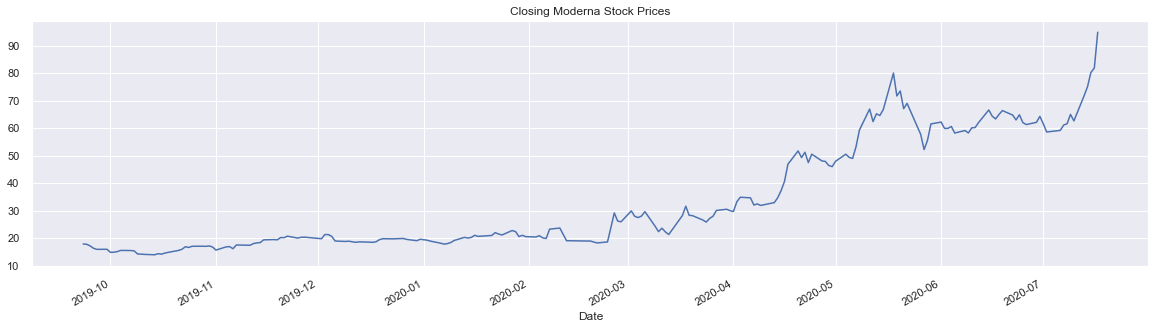

In [33]:
Moderna.Close.plot(figsize=(20,5), title='Closing Moderna Stock Prices')

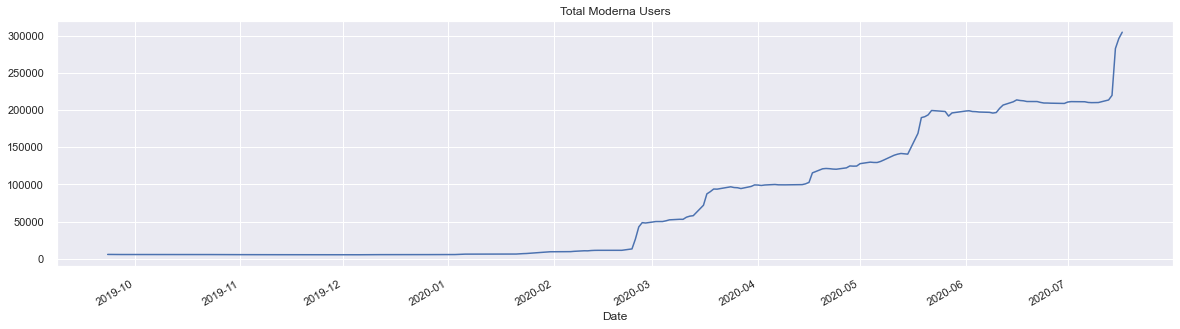

In [34]:
Moderna.users_holding_max.plot(figsize=(20,5), title='Total Moderna Users')

In [35]:
filt = (day['Ticker'] == 'DOCU')
DOCU = day[filt]
DOCU

Close      High      Low     Open Ticker      Vol  \
Date                                                             
2019-09-23   64.52   64.5300   64.330   64.360   DOCU  1077067   
2019-09-24   61.69   62.2500   61.375   62.160   DOCU   842786   
2019-09-25   62.61   62.8599   62.550   62.580   DOCU   479544   
2019-09-26   62.39   62.4500   62.030   62.050   DOCU   363381   
2019-09-27   60.63   60.6600   60.130   60.410   DOCU   582122   
...            ...       ...      ...      ...    ...      ...   
2020-07-13  190.02  196.7350  185.140  196.610   DOCU  2241806   
2020-07-14  196.43  196.9400  193.500  194.010   DOCU   834060   
2020-07-15  192.83  193.1600  190.657  190.730   DOCU   605946   
2020-07-16  191.72  191.9500  190.700  191.348   DOCU   395970   
2020-07-17  196.41  196.8400  194.203  195.060   DOCU   794085   

            users_holding_first  users_holding_last  users_holding_max  \
Date                                                                     
2019-09-23               8832.0              8832.0             8832.0   
2019-09-24               8759.0              8759.0             8759.0   
2019-09-25               8728.0              8728.0             8728.0   
2019-09-26               8704.0              8704.0             8704.0   
2019-09-27               8667.0              8667.0             8667.0   
...                         ...                 ...                ...   
2020-07-13              39936.0             39936.0            39936.0   
2020-07-14              40650.0             40650.0            40650.0   
2020-07-15              40923.0             40978.0            40978.0   
2020-07-16              40786.0             40786.0            40786.0   
2020-07-17              40467.0             40467.0            40467.0   

            users_holding_min      Time  
Date                                     
2019-09-23             8832.0  13:00:00  
2019-09-24             8759.0  13:00:00  
2019-09-25             8728.0  13:00:00  
2019-09-26             8704.0  13:00:00  
2019-09-27             8667.0  13:00:00  
...                       ...       ...  
2020-07-13            39936.0  13:00:00  
2020-07-14            40650.0  13:00:00  
2020-07-15            40923.0  13:00:00  
2020-07-16            40786.0  13:00:00  
2020-07-17            40467.0  13:00:00  

[205 rows x 11 columns]

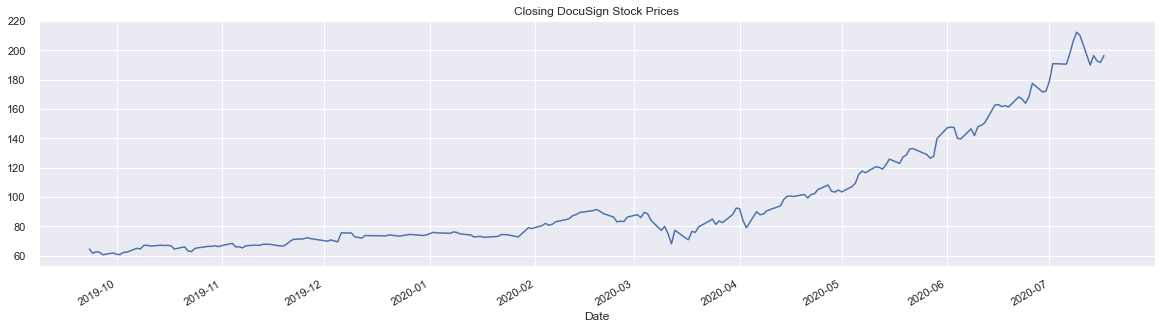

In [36]:
DOCU.Close.plot(figsize=(20,5), title='Closing DocuSign Stock Prices')

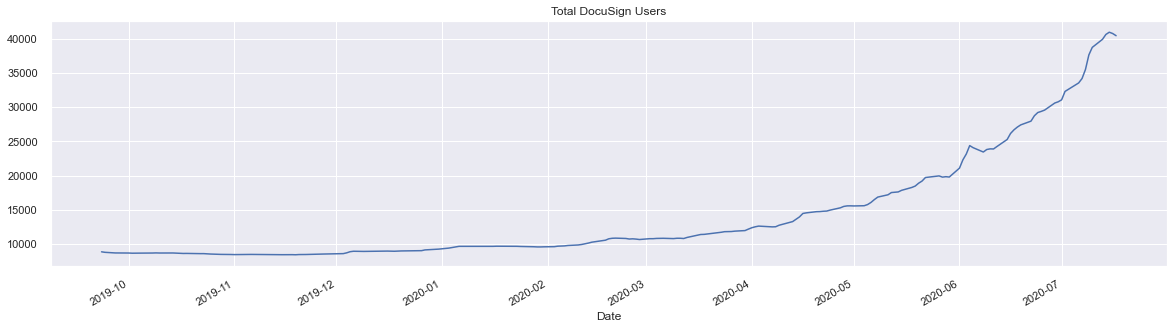

In [37]:
DOCU.users_holding_max.plot(figsize=(20,5), title='Total DocuSign Users')

In [38]:
filt = (day['Ticker'] == 'ZM')
Zoom = day[filt]
Zoom

Close     High      Low     Open Ticker      Vol  \
Date                                                            
2019-09-23   82.62   82.760   82.140   82.730     ZM   226684   
2019-09-24   80.02   80.420   79.460   80.245     ZM   591416   
2019-09-25   79.60   79.990   78.940   79.250     ZM   425089   
2019-09-26   79.75   79.980   79.560   79.590     ZM   156376   
2019-09-27   76.04   76.270   75.090   75.700     ZM   592291   
...            ...      ...      ...      ...    ...      ...   
2020-07-13  260.30  267.240  256.338  266.940     ZM  1742045   
2020-07-14  260.01  260.760  255.310  256.990     ZM   862940   
2020-07-15  256.21  257.500  254.210  255.365     ZM   768641   
2020-07-16  248.54  250.755  247.485  249.625     ZM   673664   
2020-07-17  246.54  247.160  246.020  246.729     ZM   433439   

            users_holding_first  users_holding_last  users_holding_max  \
Date                                                                     
2019-09-23              17466.0             17466.0            17466.0   
2019-09-24              17356.0             17356.0            17356.0   
2019-09-25              17298.0             17298.0            17298.0   
2019-09-26              17265.0             17265.0            17265.0   
2019-09-27              17251.0             17251.0            17251.0   
...                         ...                 ...                ...   
2020-07-13              86885.0             86885.0            86885.0   
2020-07-14              87778.0             87778.0            87778.0   
2020-07-15              87829.0             87808.0            87829.0   
2020-07-16              87881.0             87881.0            87881.0   
2020-07-17              87599.0             87599.0            87599.0   

            users_holding_min      Time  
Date                                     
2019-09-23            17466.0  13:00:00  
2019-09-24            17356.0  13:00:00  
2019-09-25            17298.0  13:00:00  
2019-09-26            17265.0  13:00:00  
2019-09-27            17251.0  13:00:00  
...                       ...       ...  
2020-07-13            86885.0  13:00:00  
2020-07-14            87778.0  13:00:00  
2020-07-15            87808.0  13:00:00  
2020-07-16            87881.0  13:00:00  
2020-07-17            87599.0  13:00:00  

[205 rows x 11 columns]

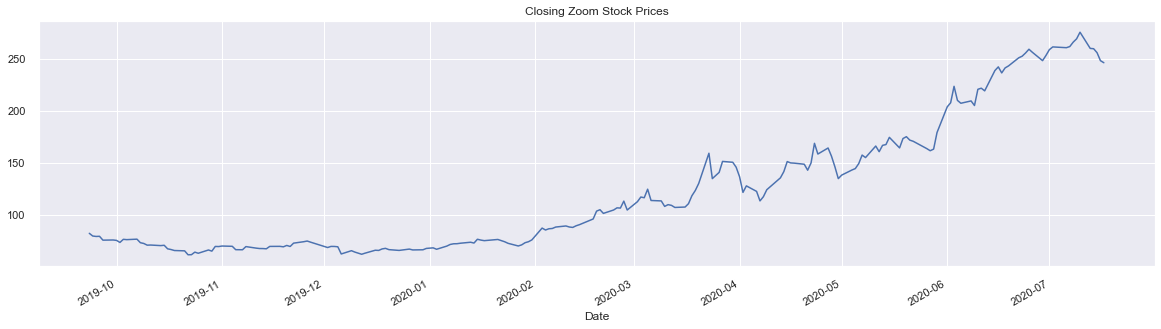

In [39]:
Zoom.Close.plot(figsize=(20,5), title='Closing Zoom Stock Prices')

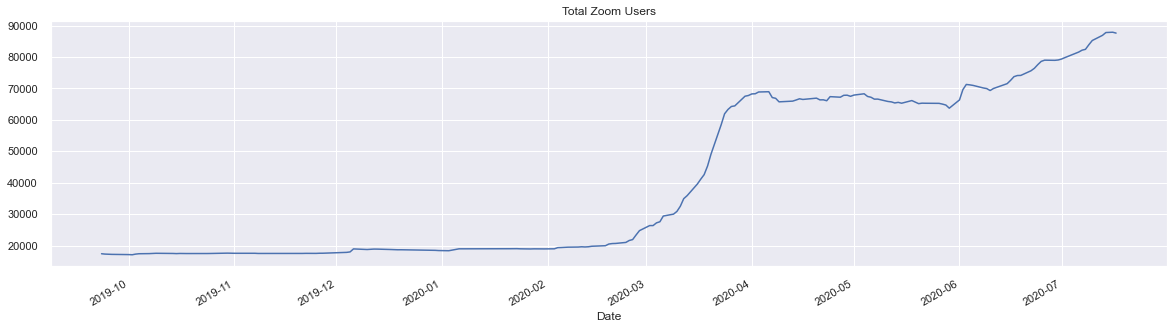

In [40]:
Zoom.users_holding_max.plot(figsize=(20,5), title='Total Zoom Users')

In [41]:
filt = (day['Ticker'] == 'AAPL')
Apple = day[filt]
Apple

Close    High     Low     Open Ticker      Vol  \
Date                                                          
2019-09-23  216.96  218.07  216.84  217.630   AAPL  4163783   
2019-09-24  215.94  216.90  215.81  216.580   AAPL  5911695   
2019-09-25  219.26  219.73  218.65  218.780   AAPL  4666053   
2019-09-26  218.12  219.17  217.71  218.280   AAPL  2367616   
2019-09-27  217.06  217.36  215.76  215.760   AAPL  3645389   
...            ...     ...     ...      ...    ...      ...   
2020-07-13  381.91  391.31  381.03  391.220   AAPL  9597969   
2020-07-14  388.23  389.02  382.87  386.570   AAPL  7646814   
2020-07-15  390.90  391.67  387.91  388.870   AAPL  4632416   
2020-07-16  386.09  387.40  384.79  385.040   AAPL  4026296   
2020-07-17  385.31  386.72  385.11  385.695   AAPL  4600965   

            users_holding_first  users_holding_last  users_holding_max  \
Date                                                                     
2019-09-23             208779.0            208779.0           208779.0   
2019-09-24             208603.0            208603.0           208603.0   
2019-09-25             208035.0            208035.0           208035.0   
2019-09-26             207604.0            207604.0           207604.0   
2019-09-27             207444.0            207444.0           207444.0   
...                         ...                 ...                ...   
2020-07-13             537692.0            537692.0           537692.0   
2020-07-14             540654.0            540654.0           540654.0   
2020-07-15             548055.0            548055.0           548055.0   
2020-07-16             552565.0            552565.0           552565.0   
2020-07-17             553016.0            553063.0           553063.0   

            users_holding_min      Time  
Date                                     
2019-09-23           208779.0  13:00:00  
2019-09-24           208603.0  13:00:00  
2019-09-25           208035.0  13:00:00  
2019-09-26           207604.0  13:00:00  
2019-09-27           207444.0  13:00:00  
...                       ...       ...  
2020-07-13           537692.0  13:00:00  
2020-07-14           540654.0  13:00:00  
2020-07-15           548055.0  13:00:00  
2020-07-16           552565.0  13:00:00  
2020-07-17           553016.0  13:00:00  

[205 rows x 11 columns]

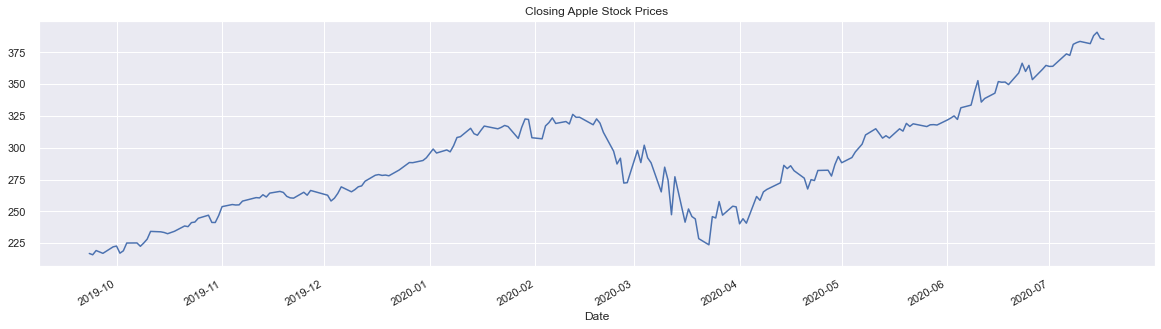

In [42]:
Apple.Close.plot(figsize=(20,5), title='Closing Apple Stock Prices')

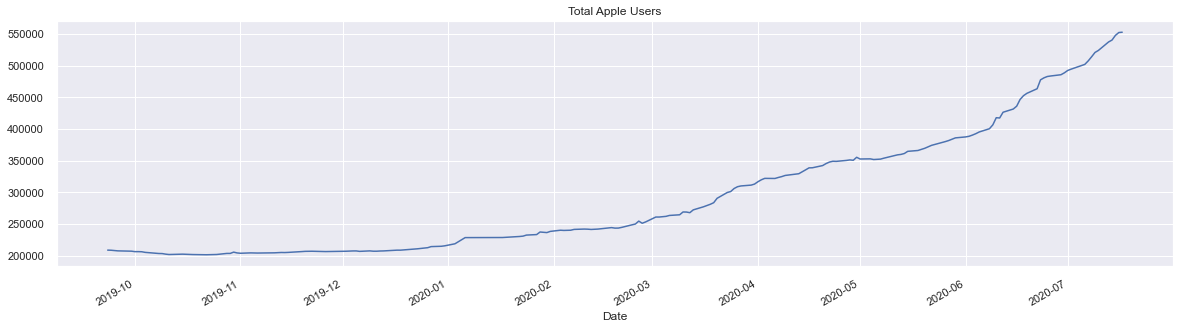

In [43]:
Apple.users_holding_max.plot(figsize=(20,5), title='Total Apple Users')

In [44]:
filt = (day['Ticker'] == 'AMZN')
AMZN = day[filt]
AMZN

Close     High      Low     Open Ticker     Vol  \
Date                                                            
2019-09-23  1785.30  1792.70  1784.10  1790.32   AMZN  366379   
2019-09-24  1741.61  1747.58  1735.55  1745.47   AMZN  637112   
2019-09-25  1768.33  1773.00  1763.26  1764.03   AMZN  533712   
2019-09-26  1740.12  1746.89  1736.50  1737.28   AMZN  311176   
2019-09-27  1725.45  1727.64  1715.92  1716.15   AMZN  499621   
...             ...      ...      ...      ...    ...     ...   
2020-07-13  3104.00  3228.24  3068.39  3228.24   AMZN  957947   
2020-07-14  3084.00  3092.01  3006.45  3043.66   AMZN  549608   
2020-07-15  3008.87  3031.50  3000.00  3026.22   AMZN  519083   
2020-07-16  2999.90  3024.92  2977.44  2992.00   AMZN  487617   
2020-07-17  2961.97  2982.68  2955.01  2979.12   AMZN  579625   

            users_holding_first  users_holding_last  users_holding_max  \
Date                                                                     
2019-09-23             116052.0            116052.0           116052.0   
2019-09-24             116612.0            116612.0           116612.0   
2019-09-25             116948.0            116948.0           116948.0   
2019-09-26             117468.0            117468.0           117468.0   
2019-09-27             117692.0            117692.0           117692.0   
...                         ...                 ...                ...   
2020-07-13             357773.0            357773.0           357773.0   
2020-07-14             362181.0            362181.0           362181.0   
2020-07-15             366864.0            367492.0           367492.0   
2020-07-16             370348.0            370601.0           370601.0   
2020-07-17             373943.0            373943.0           373943.0   

            users_holding_min      Time  
Date                                     
2019-09-23           116052.0  13:00:00  
2019-09-24           116612.0  13:00:00  
2019-09-25           116948.0  13:00:00  
2019-09-26           117468.0  13:00:00  
2019-09-27           117692.0  13:00:00  
...                       ...       ...  
2020-07-13           357773.0  13:00:00  
2020-07-14           362181.0  13:00:00  
2020-07-15           366864.0  13:00:00  
2020-07-16           370348.0  13:00:00  
2020-07-17           373943.0  13:00:00  

[205 rows x 11 columns]

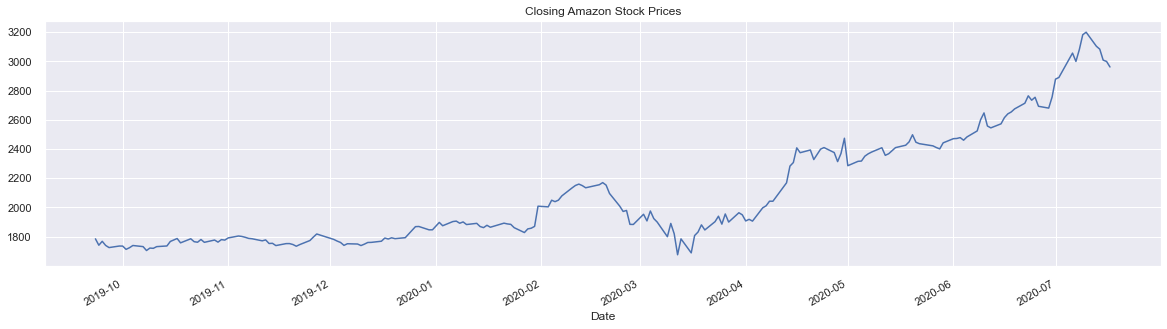

In [45]:
AMZN.Close.plot(figsize=(20,5), title='Closing Amazon Stock Prices')

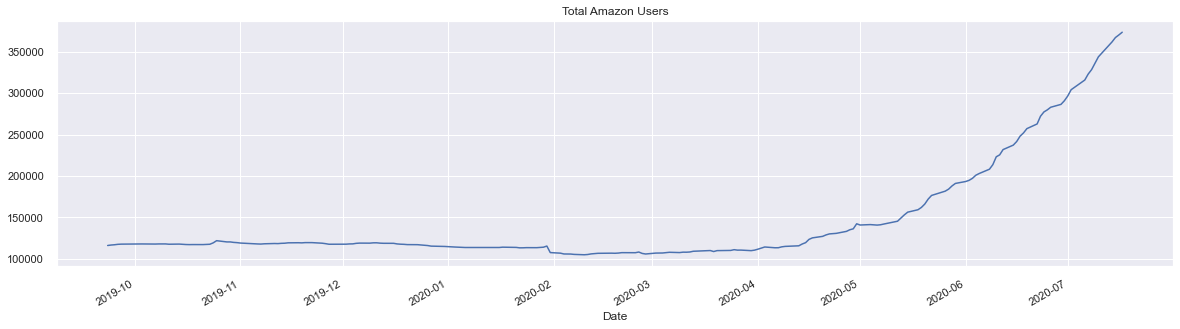

In [46]:
AMZN.users_holding_max.plot(figsize=(20,5), title='Total Amazon Users')

In [47]:
filt = (day['Ticker'] == 'NFLX')
Netflix = day[filt]
Netflix

Close    High     Low     Open Ticker      Vol  \
Date                                                          
2019-09-23  265.92  266.00  263.28  263.280   NFLX  1428620   
2019-09-24  254.59  254.61  252.28  252.545   NFLX  1955820   
2019-09-25  264.75  266.60  263.00  263.100   NFLX  2291528   
2019-09-26  263.31  265.00  262.90  263.230   NFLX   896094   
2019-09-27  263.09  263.49  261.18  261.330   NFLX  1072925   
...            ...     ...     ...      ...    ...      ...   
2020-07-13  525.49  551.70  520.96  551.660   NFLX  2449962   
2020-07-14  524.88  525.50  512.02  518.860   NFLX  1876722   
2020-07-15  523.26  524.05  519.73  522.200   NFLX  1475885   
2020-07-16  527.39  531.46  523.63  526.120   NFLX  2934714   
2020-07-17  492.99  493.33  488.93  491.770   NFLX  2188738   

            users_holding_first  users_holding_last  users_holding_max  \
Date                                                                     
2019-09-23             106072.0            106072.0           106072.0   
2019-09-24             105598.0            105598.0           105598.0   
2019-09-25             105768.0            105768.0           105768.0   
2019-09-26             105713.0            105713.0           105713.0   
2019-09-27             105599.0            105599.0           105599.0   
...                         ...                 ...                ...   
2020-07-13             184518.0            184518.0           184518.0   
2020-07-14             184998.0            184998.0           184998.0   
2020-07-15             187531.0            187865.0           187865.0   
2020-07-16             194736.0            196520.0           196520.0   
2020-07-17             213300.0            213300.0           213300.0   

            users_holding_min      Time  
Date                                     
2019-09-23           106072.0  13:00:00  
2019-09-24           105598.0  13:00:00  
2019-09-25           105768.0  13:00:00  
2019-09-26           105713.0  13:00:00  
2019-09-27           105599.0  13:00:00  
...                       ...       ...  
2020-07-13           184518.0  13:00:00  
2020-07-14           184998.0  13:00:00  
2020-07-15           187531.0  13:00:00  
2020-07-16           194736.0  13:00:00  
2020-07-17           213300.0  13:00:00  

[205 rows x 11 columns]

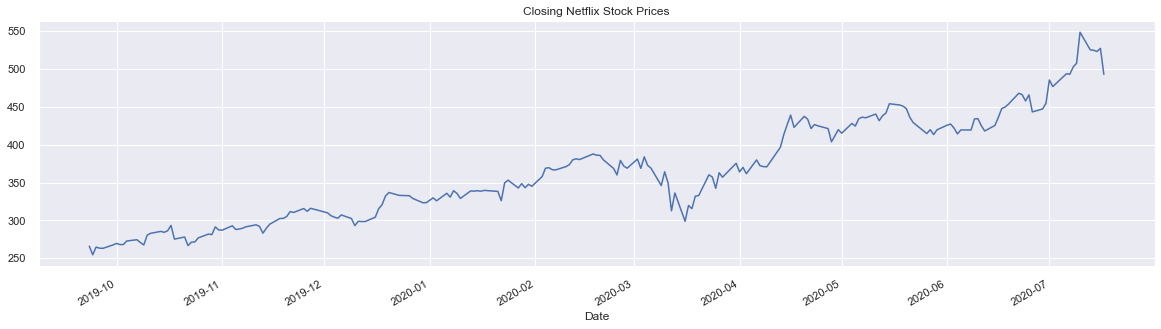

In [48]:
Netflix.Close.plot(figsize=(20,5), title='Closing Netflix Stock Prices')

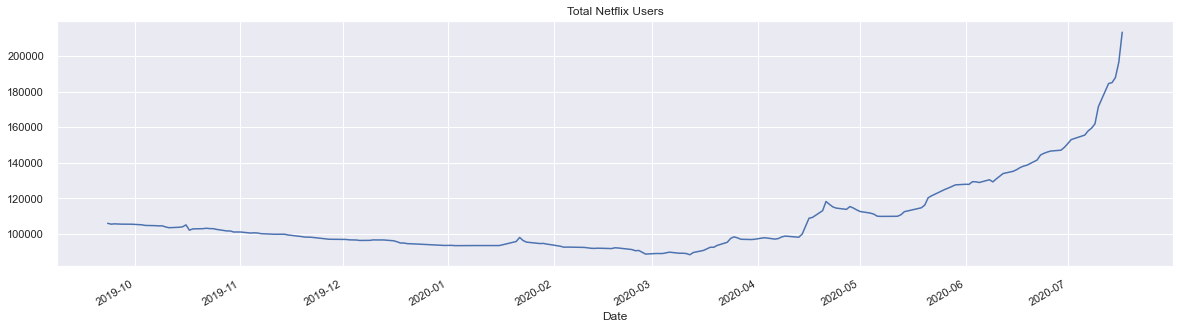

In [49]:
Netflix.users_holding_max.plot(figsize=(20,5), title='Total Netflix Users')

In [50]:
Netflix.loc['2020-07-17']

Close                    492.99
High                     493.33
Low                      488.93
Open                     491.77
Ticker                     NFLX
Vol                     2188738
users_holding_first      213300
users_holding_last       213300
users_holding_max        213300
users_holding_min        213300
Time                   13:00:00
Name: 2020-07-17 00:00:00, dtype: object

# Conclusion

After analysing the Robinhood data, I came up with the following conclusions to my discovery questions:

1. How much has Robinhood's user base changed since the COVID 19 declaration on March 13, 2020?

Robinhood users had grown substantailly post COVID 19. The official declaration date for COVID was March 13, 2020 and my data went up to July 17, 2020. Between that time, the total user amount increased by 122.26%. This is a direct correlation with people wanting to invest due to the stock market quick crash in March and it's quick bounce back through July 17th. 

2. What are the most popular assets among Robinhood users?

The most popular assets among Robinhood users were: 

           Stock Name               % Change Post COVID         Price Change from 03/13 - 07/17
    1. Aurora Cannabis Inc.               22.00%                          $9.24 - $11.88
    2. Ford                               20.78%                          $5.63 - $6.80
    3. General Electric                   -9.80%                          $7.84 - $7.07
    4. Walt Disney                        15.70%                          $102.52 - $118.65
    5. GoPro Inc.                         82.56%                          $2.70 - $4.92
    
These percentage changes, besides GE seems to be great looking at it from just a percentage change stand point. But all of the assets, except for Disney has a stock price of under $10 and their returns are very limited from a dollar amount stand point. 
    
3. Did Robinhood users choose the most profitable assets?

Looking at the most profitable stocks post COVID:

          Stock Name               % Change Post COVID         Price Change from 03/13 - 07/17
    1. Moderna                            345.00%                         $21.30 - $94.85
    2. DocuSign                           153.86%                         $77.37 - $196.41
    3. Zoom                               129.00%                         $107.47 - $246.54
    4. Amazon                             65.94%                          $1785.00 - $2961.97
    5. Netflix                            46.60%                          $336.28 - $492.99
    
It is very apparent that the Robinhood users did not choose the most profitable assets. My conclusion leads to price being one factor and not understanding recessions and how the economy works in another factor. I will go more into detail with that in the Recommendation section.

# Recommendation

I believe that the Robinhood users did not invest in the most profitable assets based on my findings. The assets that were the most popular were assets that would have be profitable pre COVID 19. If you look further into these specific industries, they have all been declining since March 13, 2020. Because of the current circumstances, our 'new normal' may become a permanent reality and investment strategies must shift. Industries like the car, agriculture, home appliances, and entertainment may all never be what they once were. When investing, you must look at the bigger picture. 

With companies now having to shift their business to an almost 100% digital platform, companies like FAANG are on the rise more than ever. FAANG stands for Facebook, Amazon, Apple, Netflix, and Alphabet(Google). Looking into technology companies seems to be the better investment move going forward. Thinking about how our world will forever change because of COVID 19 has to be in the forefront when making business and investment decisions. This is a concept that a lot of people, if not exposed to it, will not think about on their own. As you can see from my findings, self-managed investments without some form of in-depth knowledge about finance and economics will prohibit maximum profits. Just understanding the buy low, sell high method will give your ROI a boost. Smart investing is a proactive process and not a reactive process. If you react to the market, you will always be behind it. Working with a professional or at least someone who understands these concepts will ensure you are maximizing your portfolio growth potential.